In [23]:
emotions = ["anger", "fear", "joy", "love", "sadness", "surprise"]

In [42]:
import decks

net = decks.DecksNet(0.2)

Using 67:40 for hidden layers


In [43]:
import numpy as np

# (1) Heya!
# (2) Hey man
# (3) I'm super excited to see you tonight!
# (4) Look...there's something I need to tell you...
# (5) What?
# (6) I <some horrible thing>
# (7) You...what?!
# (8) I'm really sorry man...
# (9) Bro go screw yourself. Forget about tonight.
# (0) Come on man...

x = np.array(
    [
        [0.00, 0.10, 0.70, 0.20, 0.00, 0.00], # 1
        [0.17, 0.17, 0.17, 0.17, 0.16, 0.16], # 2
        [0.00, 0.00, 0.95, 0.05, 0.00, 0.00], # 3
        [0.00, 0.80, 0.00, 0.00, 0.20, 0.00], # 4
        [0.00, 0.60, 0.00, 0.00, 0.00, 0.40], # 5
        [0.10, 0.40, 0.00, 0.10, 0.20, 0.20], # 6
        [0.75, 0.00, 0.00, 0.00, 0.10, 0.15], # 7
        [0.00, 0.20, 0.00, 0.00, 0.80, 0.00], # 8
        [0.90, 0.00, 0.00, 0.00, 0.10, 0.00], # 9
        [0.05, 0.10, 0.00, 0.00, 0.85, 0.00], # 10
    ]
)

In [44]:
preds = net.context(x)
np.round(preds, 3)

array([[0.408, 0.254, 0.896, 0.781, 0.103, 0.844],
       [0.467, 0.319, 0.832, 0.763, 0.167, 0.856],
       [0.442, 0.289, 0.865, 0.769, 0.135, 0.855],
       [0.565, 0.432, 0.724, 0.686, 0.264, 0.822],
       [0.611, 0.492, 0.668, 0.632, 0.306, 0.791],
       [0.649, 0.547, 0.611, 0.591, 0.358, 0.741],
       [0.7  , 0.588, 0.573, 0.547, 0.38 , 0.696],
       [0.716, 0.663, 0.473, 0.488, 0.491, 0.602],
       [0.765, 0.693, 0.448, 0.449, 0.491, 0.57 ],
       [0.731, 0.73 , 0.373, 0.403, 0.58 , 0.498]])

In [65]:
samples = (
    "Feck off.",
    "You're awful.",
    "Oh, that's just amazing isn't it?",
    "Feck off.",
    "Leave me alone.",
)

preds = net.predict(samples)
np.round(preds, 3)

1/1 [==============================] - 0s 40ms/step


array([[0.877, 0.69 , 0.43 , 0.388, 0.42 , 0.53 ],
       [0.836, 0.736, 0.381, 0.372, 0.506, 0.491],
       [0.788, 0.664, 0.481, 0.462, 0.443, 0.592],
       [0.805, 0.671, 0.471, 0.448, 0.44 , 0.581],
       [0.791, 0.696, 0.441, 0.436, 0.484, 0.557]])

In [50]:
for i, v in enumerate(np.argmax(preds, axis=1)):
    print(f"{i + 1:>2} : {v} : {preds[i][v]:.2f}")

 1 : 2 : 0.90
 2 : 5 : 0.86
 3 : 2 : 0.86
 4 : 5 : 0.82
 5 : 5 : 0.79
 6 : 5 : 0.74
 7 : 0 : 0.70
 8 : 0 : 0.72
 9 : 0 : 0.77
10 : 0 : 0.73


In [46]:
net.context.path

array([[ 0.78659999,  0.52919999,  0.43939999],
       [ 0.63956799,  0.505056  ,  0.36234   ],
       [ 0.70405439,  0.52754479,  0.40505199],
       [ 0.39076351,  0.51387584,  0.23092159],
       [ 0.27013081,  0.55270067,  0.14497727],
       [ 0.14862464,  0.52496054,  0.07414182],
       [ 0.02357972,  0.54348843,  0.09669345],
       [-0.15865623,  0.39415075, -0.04672524],
       [-0.26472498,  0.43824059,  0.00569981],
       [-0.38783999,  0.29941247, -0.11482016]])

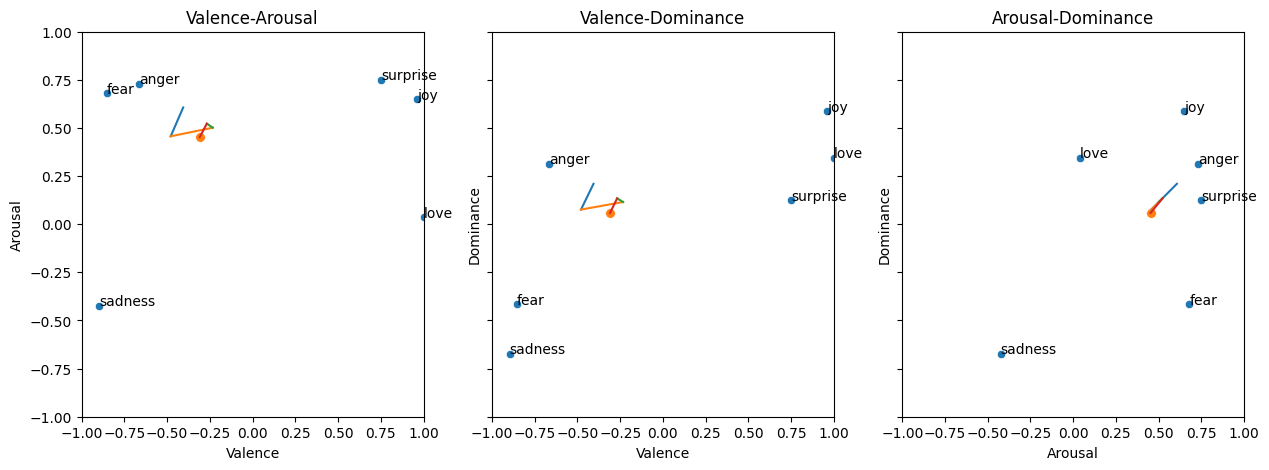

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)

dims = {
    "Valence-Arousal": (0, 1),
    "Valence-Dominance": (0, 2),
    "Arousal-Dominance": (1, 2),
}

for i, (k, v) in enumerate(dims.items()):
    axes[i].set_title(k)
    axes[i].set_xlabel(k.split("-")[0])
    axes[i].set_ylabel(k.split("-")[1])

    sns.scatterplot(ax=axes[i], x=net.context.points[:, v[0]], y=net.context.points[:, v[1]])
    for j, text in enumerate(emotions):
        axes[i].annotate(text, (net.context.points[j, v[0]], net.context.points[j, v[1]]))

    for j in range(1, len(net.context.path)):
        sns.lineplot(ax=axes[i], x=net.context.path[j-1:j+1, v[0]], y=net.context.path[j-1:j+1, v[1]])
    sns.scatterplot(ax=axes[i], x=[net.context.path[-1, v[0]]], y=[net.context.path[-1, v[1]]], s=50)